In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
two_blobs=pd.read_csv("cluster_two_blobs.csv")

In [4]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

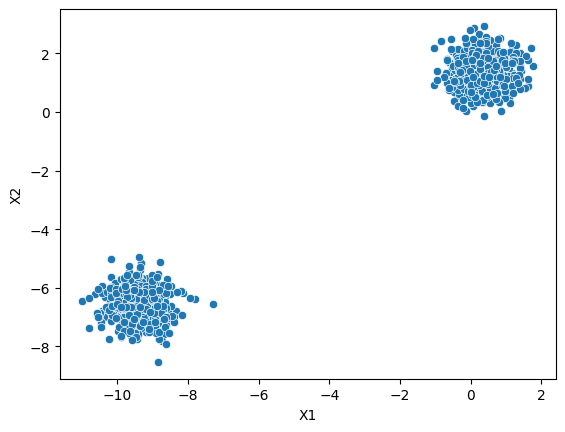

In [5]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

In [10]:
two_blobs_outliers=pd.read_csv("cluster_two_blobs_outliers.csv")   # with outliers

In [11]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

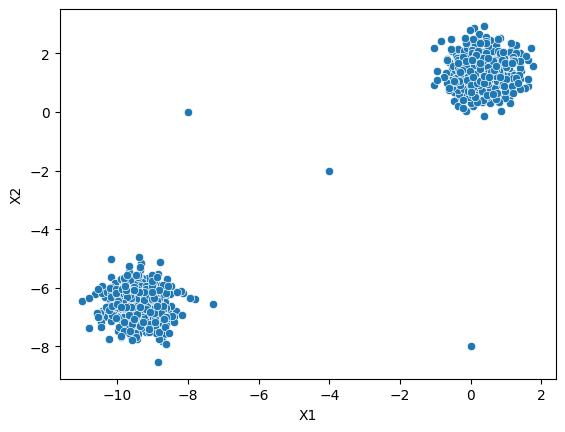

In [12]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

In [13]:
def display_categories(model,data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan=DBSCAN()  # taking by default parameters

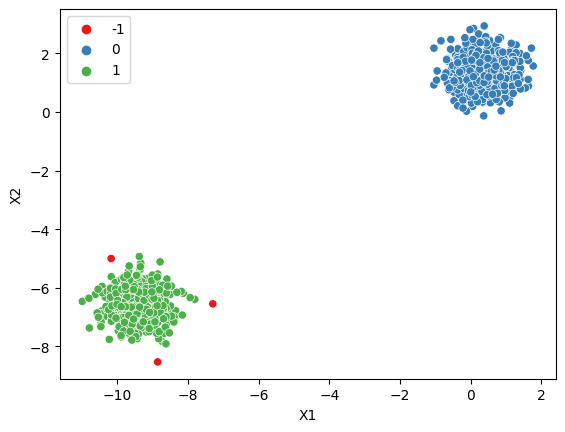

In [16]:
display_categories(dbscan,two_blobs)

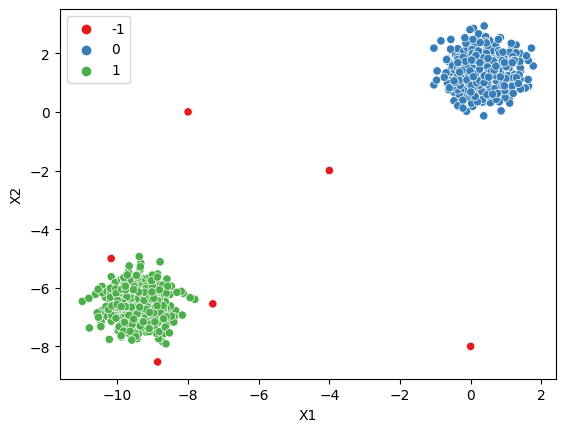

In [17]:
display_categories(dbscan,two_blobs_outliers)

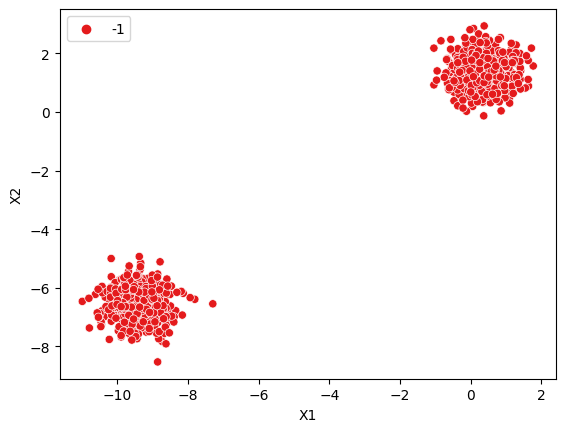

In [19]:
dbscan=DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs) # display every pints as outliers

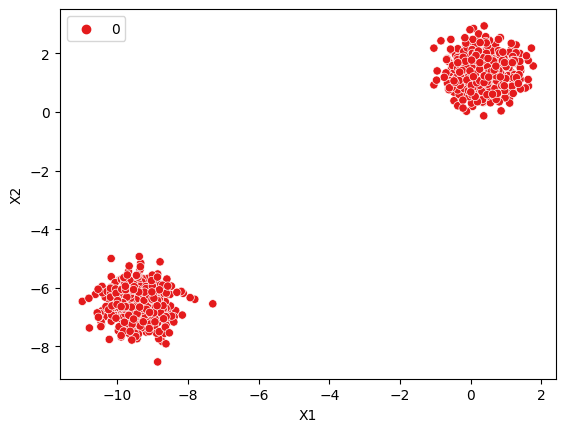

In [21]:
dbscan=DBSCAN(eps=10)
display_categories(dbscan,two_blobs)    # take every points under 1 cluster

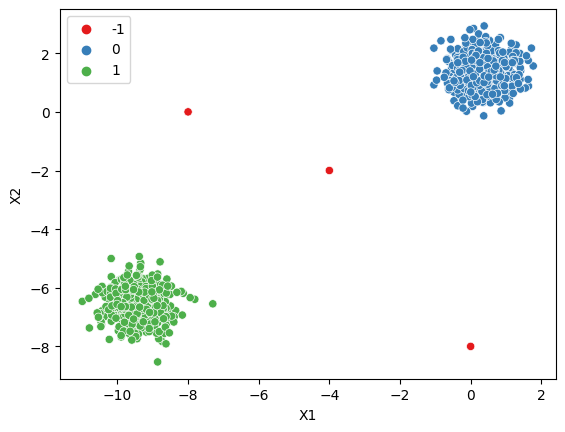

In [24]:
dbscan=DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)  

In [25]:
#  total no. of outliers
np.sum(dbscan.labels_==-1)

3

In [26]:
#  visulazing number of outliers vs eps

In [29]:
number_of_outliers=[]
outlier_percent=[]
for eps in np.linspace(0.001,10,100):
    dbscan=DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
    
    percent_outlier=100*(np.sum(dbscan.labels_==-1))/len(two_blobs_outliers)
    outlier_percent.append(percent_outlier)

<Axes: >

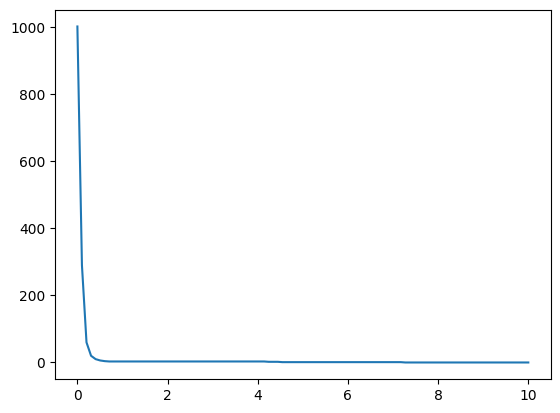

In [30]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)

(0.0, 2.0)

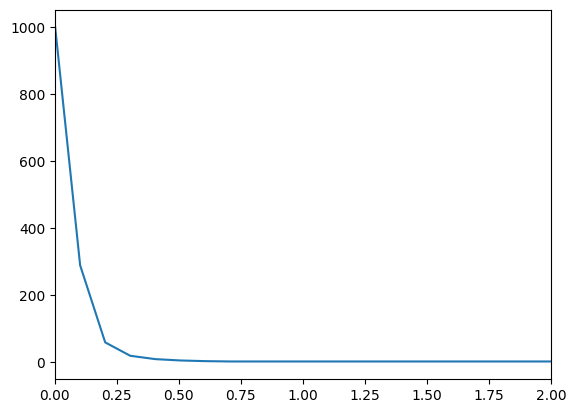

In [31]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.xlim(0,2)

Text(0, 0.5, 'Percentage of points classified as outliers')

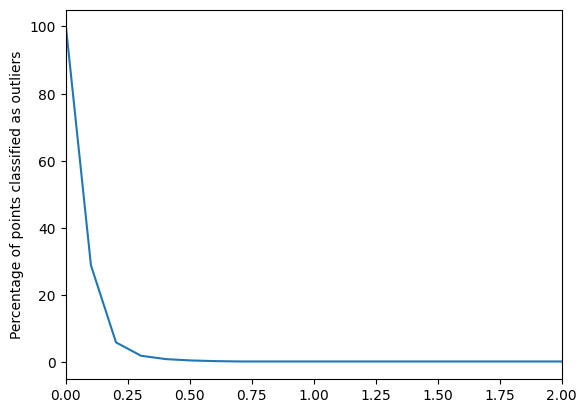

In [34]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outlier_percent)
plt.xlim(0,2)
plt.ylabel("Percentage of points classified as outliers")

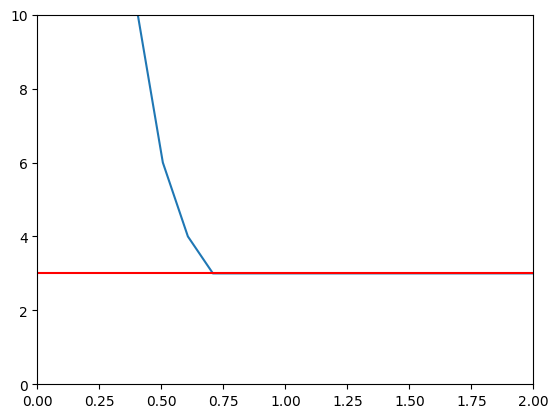

In [36]:
#  finding epsilon and point where outliers become constant
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

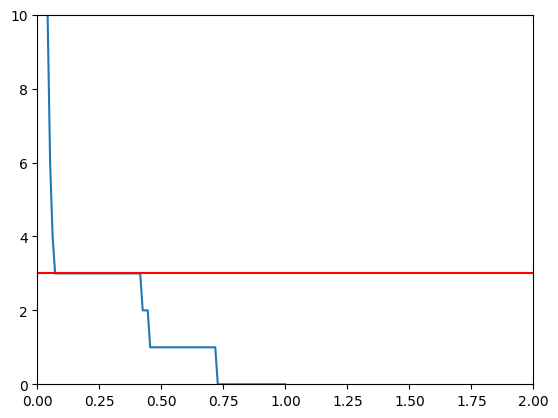

In [37]:
sns.lineplot(x=np.linspace(0.001,1,100),y=number_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)
plt.hlines(y=3,xmin=0,xmax=2,color='red')

In [38]:
#  visualizing min. number of samples

In [44]:
number_of_outliers=[]
outlier_percent=[]
for n in np.arange(1,100):
    dbscan=DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_==-1))
    
    percent_outlier=100*(np.sum(dbscan.labels_==-1))/len(two_blobs_outliers)
    outlier_percent.append(percent_outlier)

<Axes: >

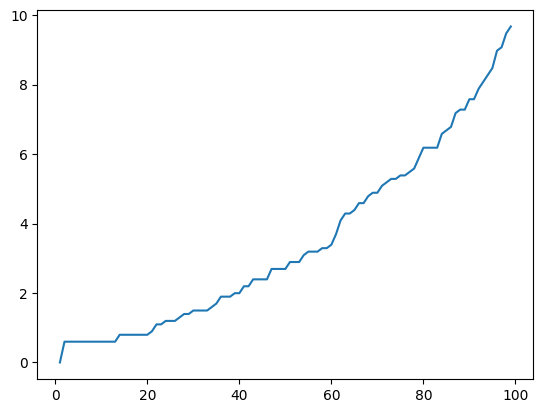

In [46]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)

In [47]:
#  ideally we chose min_samples=2*number of dimenion in dataset

In [50]:
num_dim=two_blobs_outliers.shape[1]

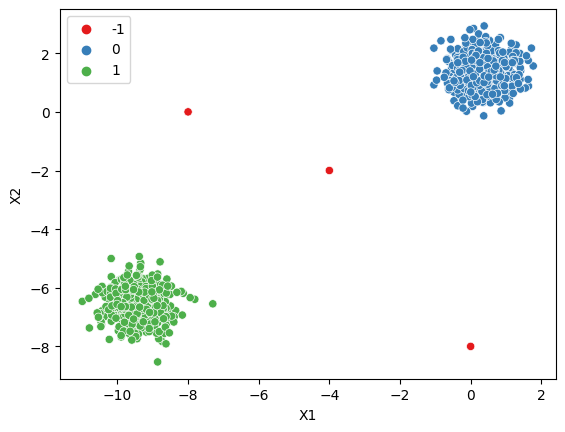

In [53]:
dbscan=DBSCAN(min_samples=2*num_dim,eps=0.75)
display_categories(dbscan,two_blobs_outliers)